In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

In [2]:
df = pd.read_csv('./dataset/marketing_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
# 刪除columns空白值
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
# 將Income改成int
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float')


In [7]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [8]:
# missing data
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

<Axes: >

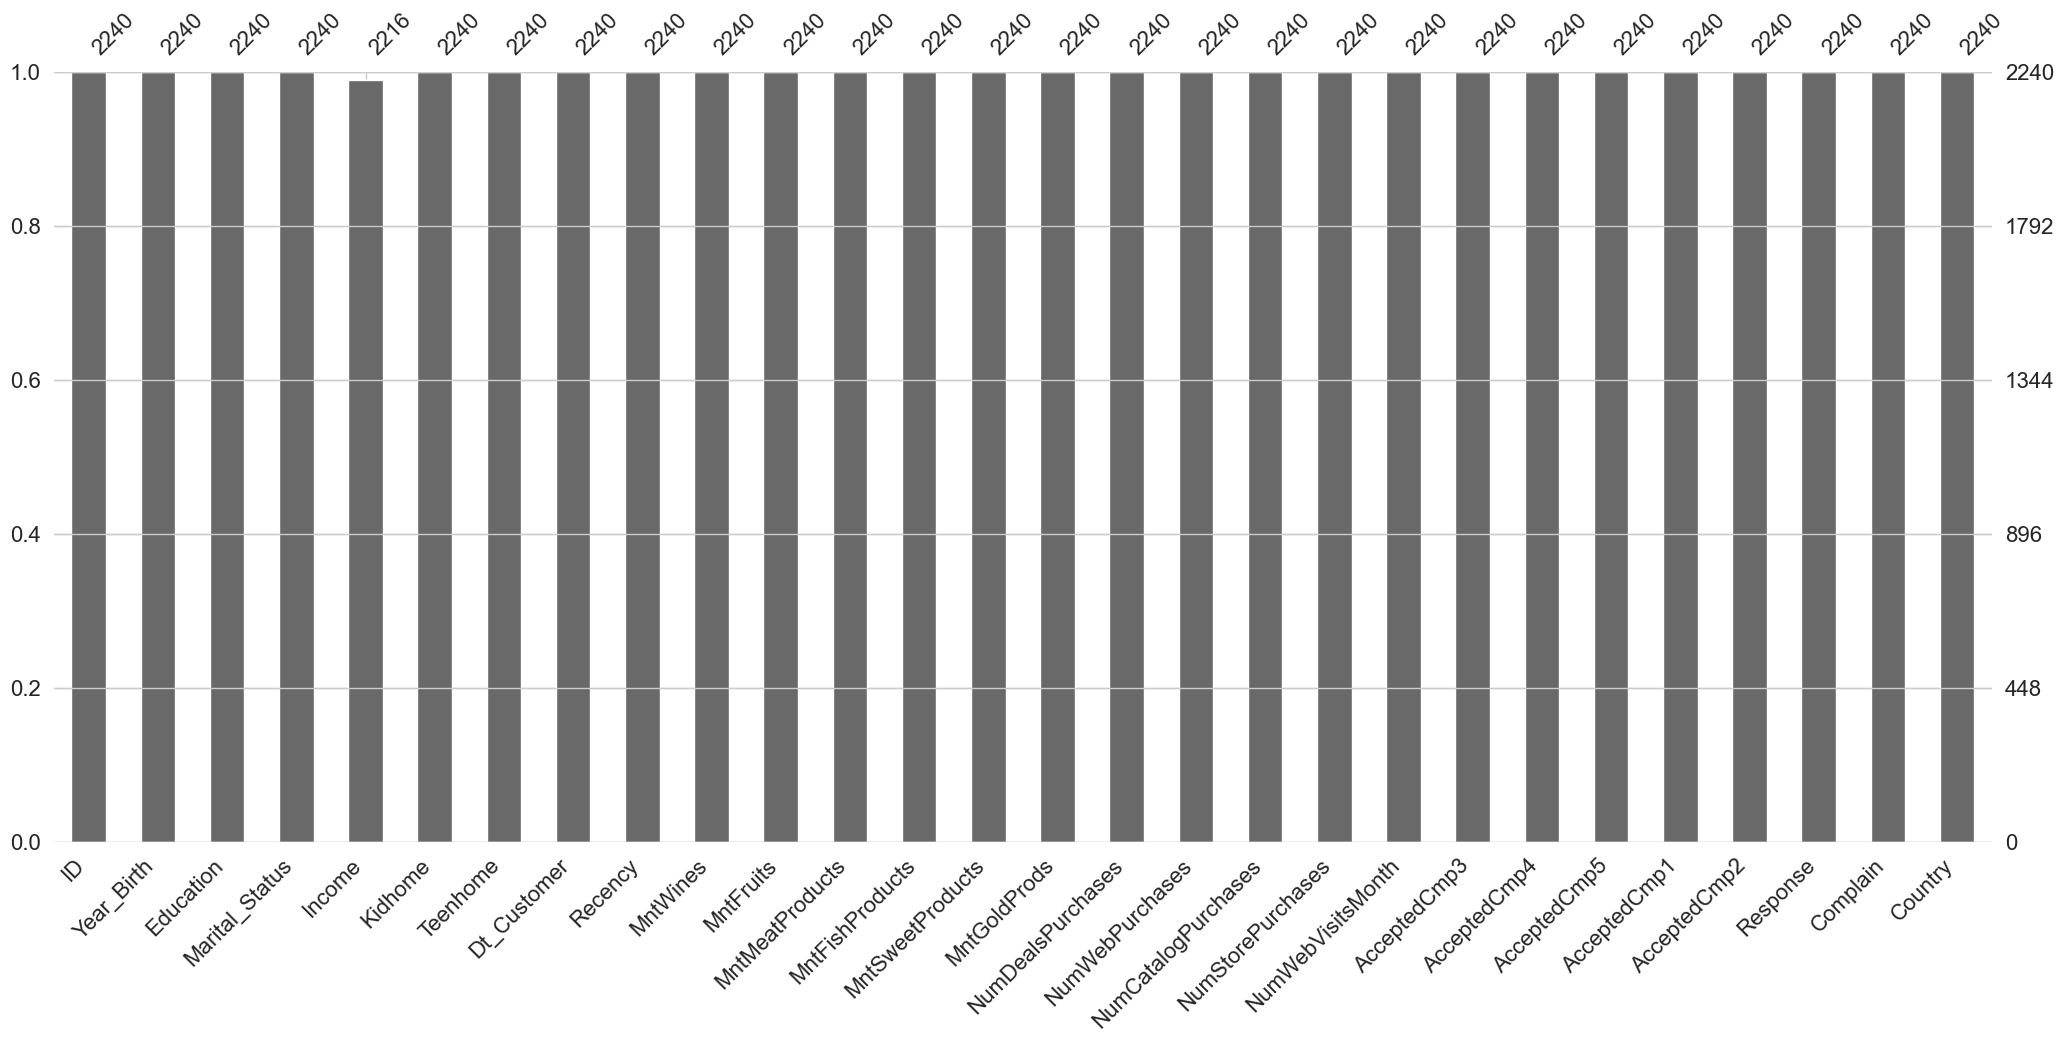

In [9]:
import missingno as msno

msno.bar(df)

<Axes: >

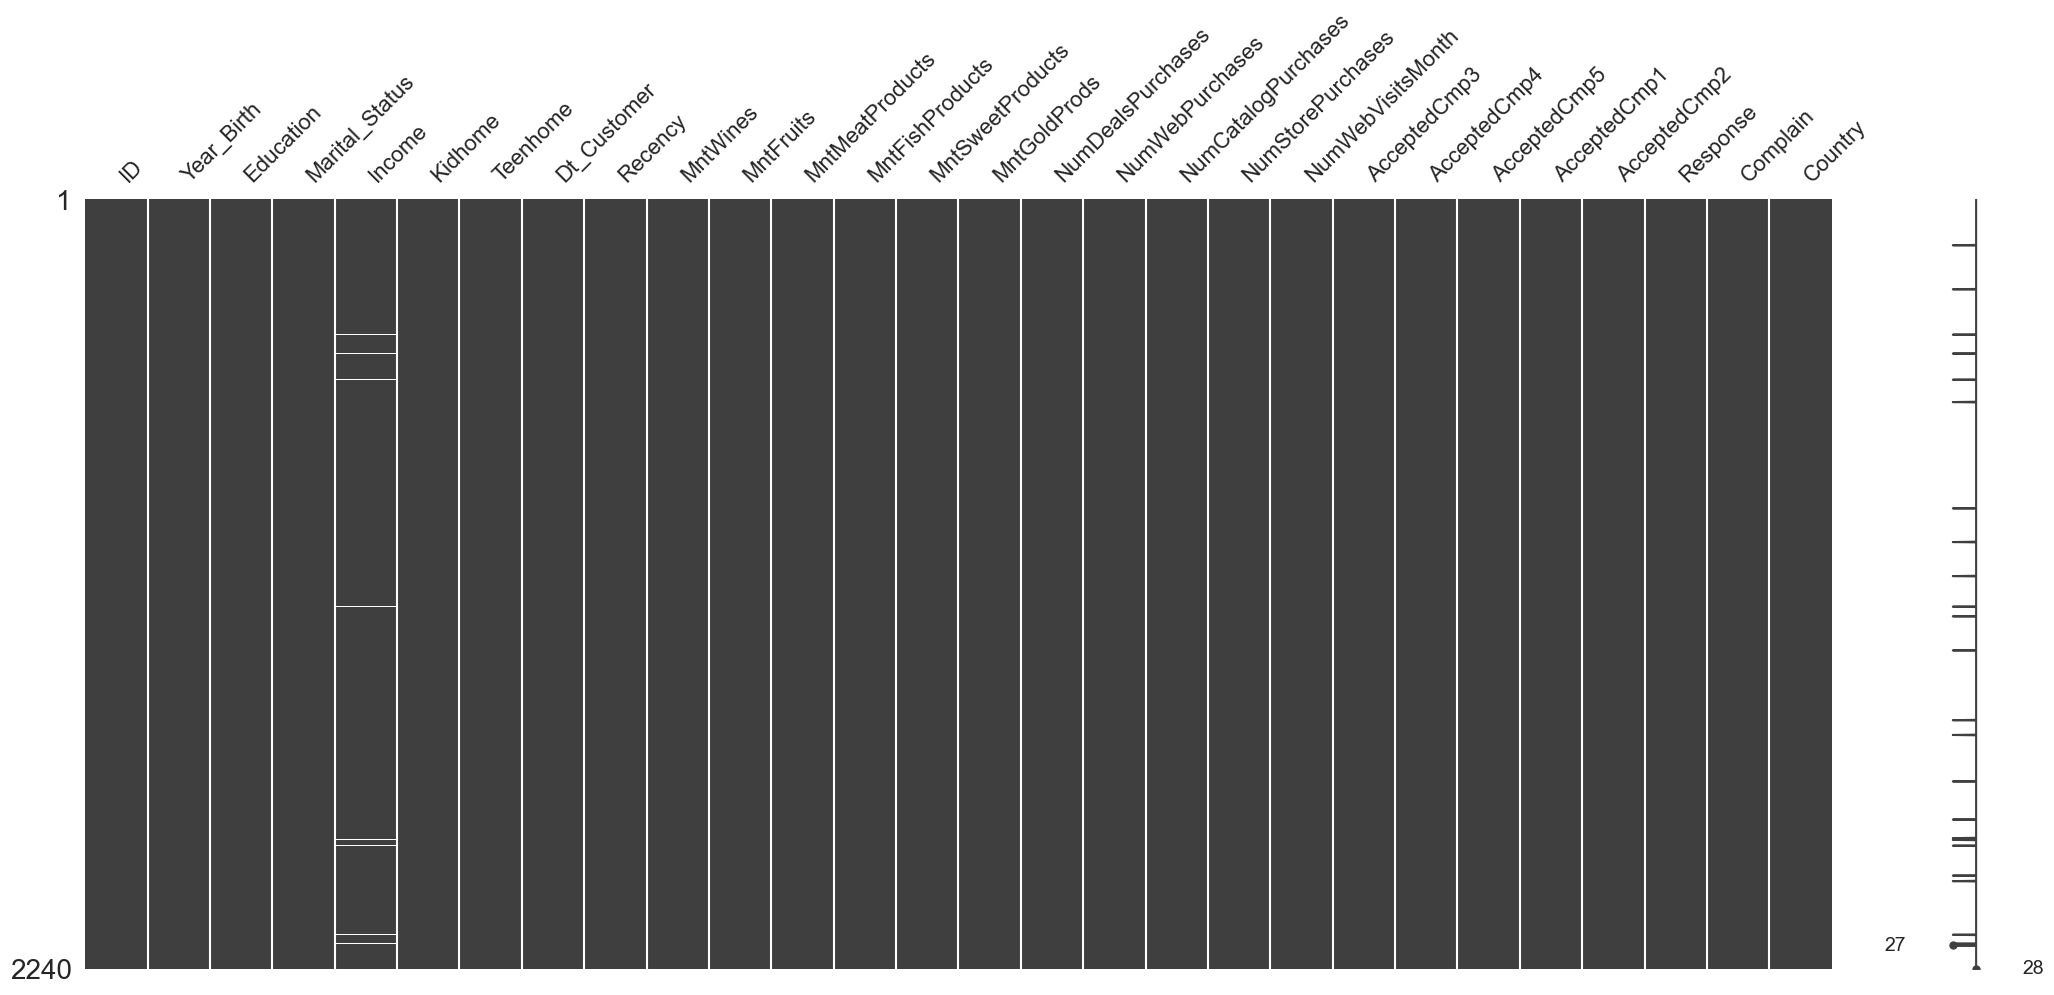

In [10]:
msno.matrix(df)

In [11]:
df.dropna(subset=['Income'], inplace=True)

<Axes: >

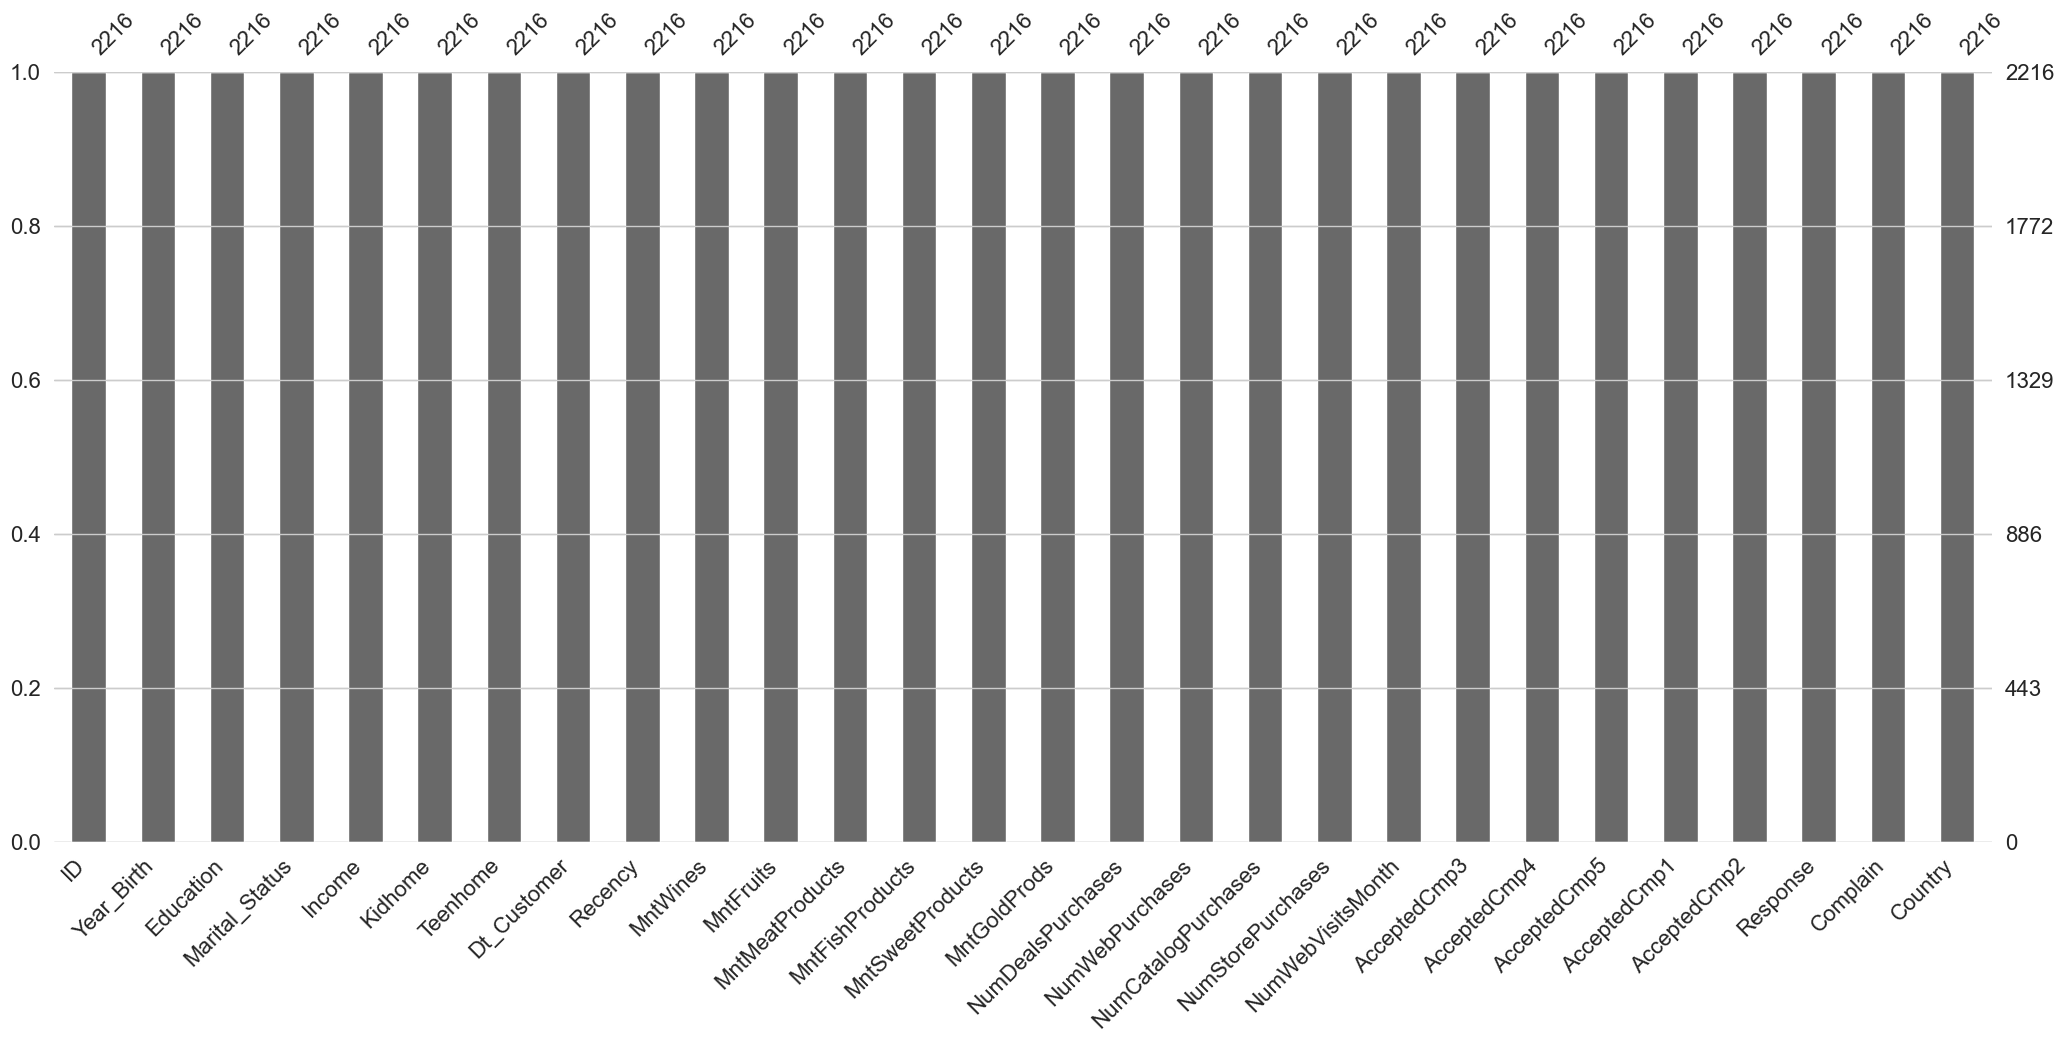

In [12]:
msno.bar(df)

In [13]:
# Outlier
df_to_plot = (df
    .drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
    .select_dtypes(include=np.number)
)

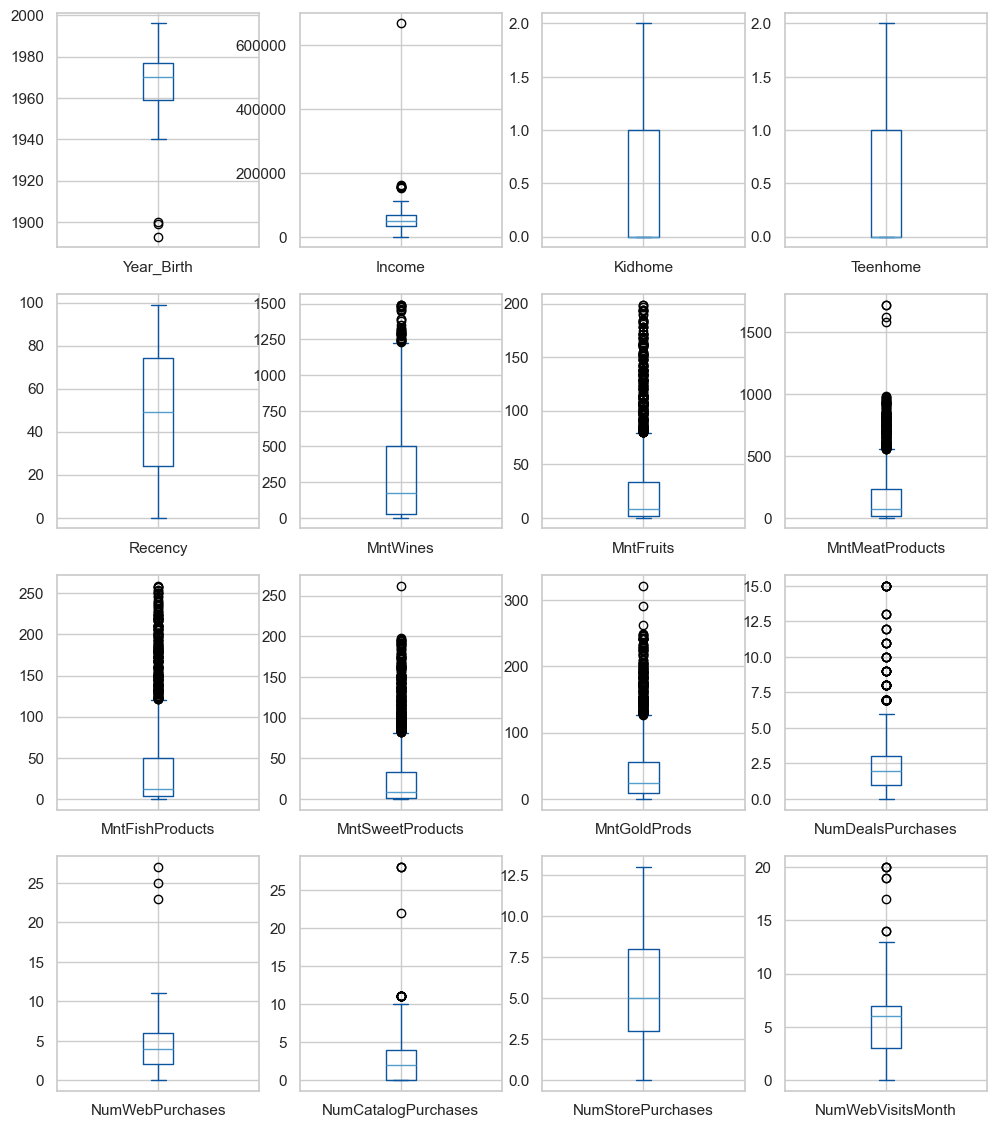

In [14]:
# subplots for outlier check
df_to_plot.plot(subplots=True, kind='box', layout=(4, 4), figsize=(12, 14))
plt.subplots_adjust()

In [15]:
# 將Year_birth<1900的刪除
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

In [16]:
# 改成日期格式
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

/var/folders/l2/bknyt2k17lj2qkkxc1ls9xp40000gn/T/ipykernel_13699/3072708644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [17]:
# 刪除income的離群值
Q3 = df['Income'].quantile(0.75)
Q1 = df['Income'].quantile(0.25)
IQR = Q3 - Q1

In [18]:
df = df[(df['Income'] < Q3 + 1.5*IQR) & (df['Income'] > Q1 - 1.5*IQR)]

In [19]:
df = df.reset_index(drop=True)

<Axes: ylabel='Income'>

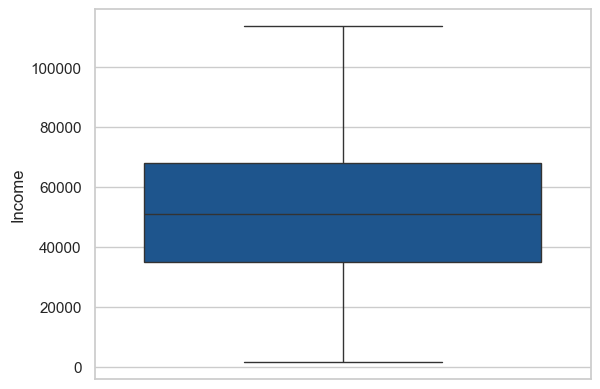

In [20]:
# 刪除income的離群值
sns.boxplot(data=df, y='Income')

In [21]:
# 檢查有沒有重複值
df.duplicated().sum()

np.int64(0)

In [22]:
# Feature Engineering
# Education
print(df['Education'].unique())

def transform_education_level(education):
    if education in ['Graduation' 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Medium'
    else:
        return 'Low'
    
df['Education_level'] = df['Education'].apply(transform_education_level)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [23]:
# living status
df['Marital_Status'].unique()

def transform_living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living alone'
    else:
        return 'Living with others'
    
df['Living_Status'] = df['Marital_Status'].apply(transform_living_status)

In [24]:
# create age
import datetime
now_year=datetime.datetime.now().year
print(now_year)

df['Age'] = now_year - df['Year_Birth']

2025


In [25]:
# TotalAcceptedCmp
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [26]:
# total spent
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [27]:
df['Is_parent'] = (df[['Kidhome', 'Teenhome']].sum(axis=1) > 0).astype('int')

In [28]:
total_purchases =  df[['NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['online_purchase_ration'] = np.where(total_purchases == 0, 0, df['NumWebPurchases'] / total_purchases)

In [29]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_level,Living_Status,Age,TotalAcceptedCmp,Spent,Is_parent,online_purchase_ration
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,Low,Living with others,55,0,1379,0,0.266667
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,Low,Living with others,64,1,1041,0,0.388889
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,Low,Living with others,67,0,385,1,0.272727
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,Low,Living with others,58,0,21,1,0.250000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,Low,Living with others,36,1,97,1,0.375000


In [30]:
# drop columns
to_drop = ['Dt_Customer', 'Year_Birth', 'ID']
df.drop(columns=to_drop, inplace=True)

In [31]:
# onehotencoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

cat = df.select_dtypes(exclude=np.number)
cat = pd.DataFrame(
    enc.fit_transform(cat),
    columns=enc.get_feature_names_out(cat.columns)
)
cat.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Education_level_High,Education_level_Low,Education_level_Medium,Living_Status_Living alone,Living_Status_Living with others
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
num = df.select_dtypes(include=np.number)
df2 = pd.concat([num, cat], axis=1)

df2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,TotalAcceptedCmp,Spent,Is_parent,online_purchase_ration,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Education_level_High,Education_level_Low,Education_level_Medium,Living_Status_Living alone,Living_Status_Living with others
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,55,0,1379,0,0.266667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,64,1,1041,0,0.388889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,67,0,385,1,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,58,0,21,1,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,36,1,97,1,0.375000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df3 = pd.DataFrame(
    scaler.fit_transform(df2),
    columns=df2.columns
)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df3)

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_list = []
for k in range(2,9):
    model = KMeans(n_clusters=k, random_state=3)
    pred_cluster = model.fit_predict(pca_result)
    silhouette = silhouette_score(pca_result, pred_cluster)
    silhouette_list.append(silhouette)

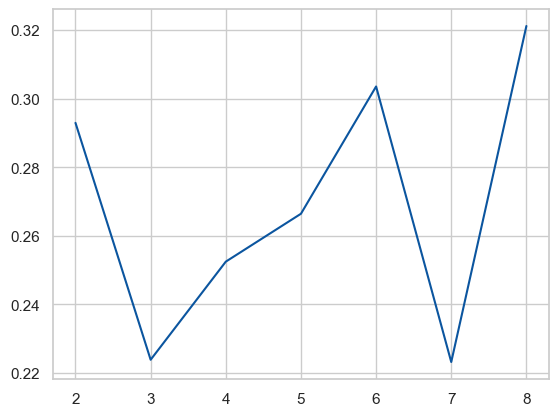

In [36]:
plt.plot(range(2,9), silhouette_list)

In [37]:
# elbow method
inertia_list = []
for k in range(2,9):
    model = KMeans(n_clusters=k, random_state=3)
    model.fit(pca_result)
    inertia = model.inertia_
    inertia_list.append(inertia)

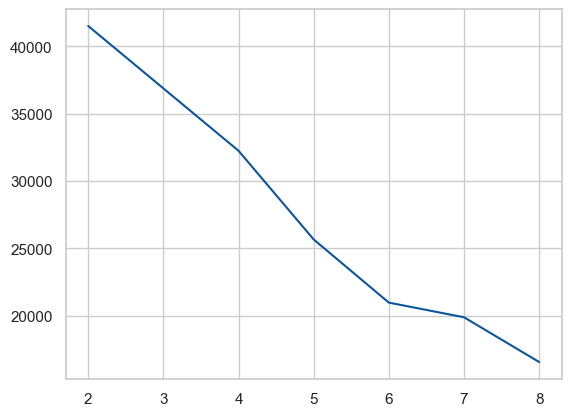

In [38]:
plt.plot(range(2,9), inertia_list)

In [39]:
# cluster = 6
model = KMeans(n_clusters=6, random_state=3)
pred_cluster = model.fit_predict(pca_result)

In [40]:
df['cluster'] = pred_cluster

In [41]:
df['cluster'].value_counts()

cluster
0    836
2    553
1    449
5    306
3     54
4      7
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='MntSweetProducts'>

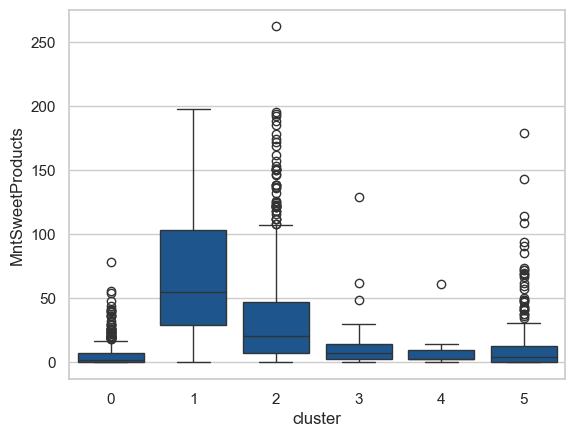

In [42]:
sns.boxplot(data=df, x='cluster', y='MntSweetProducts')